224329011 Ahmet Muratoğlu

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import cv2
import math  # math modülünü içe aktar
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow # cv2_imshow'u içe aktar

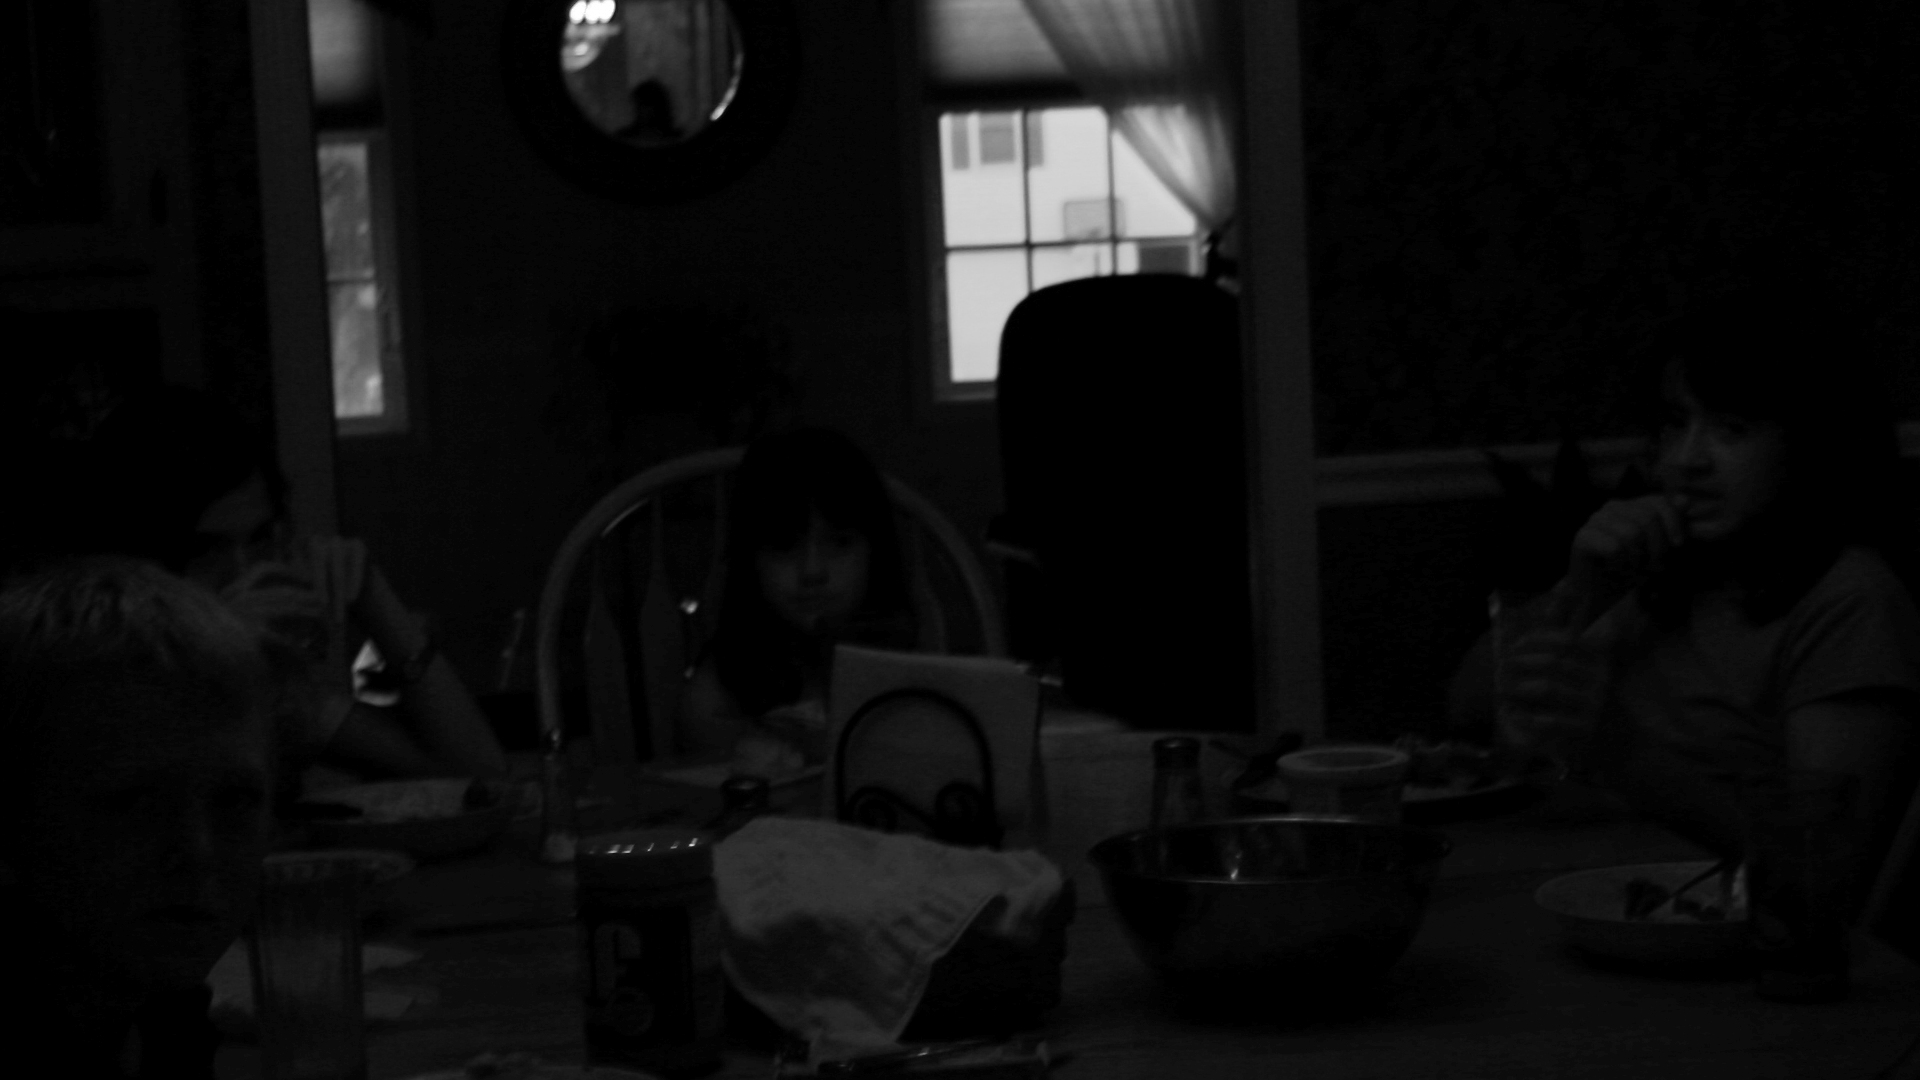

In [55]:
# Görüntüyü yükleme
image = cv2.imread('/content/drive/MyDrive/YZM507/goruntu3.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

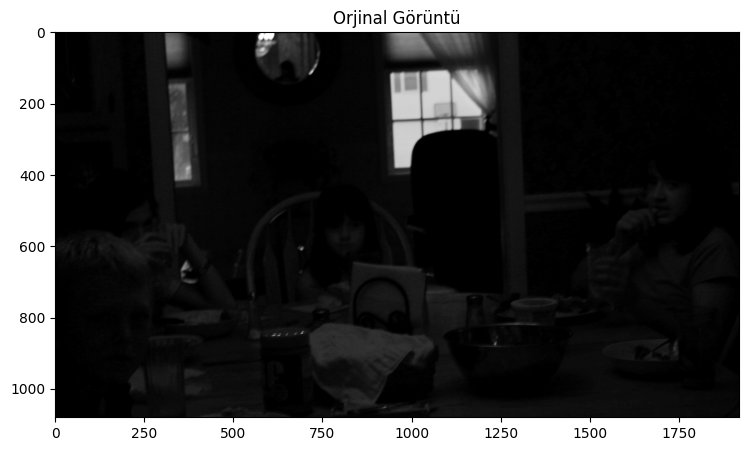

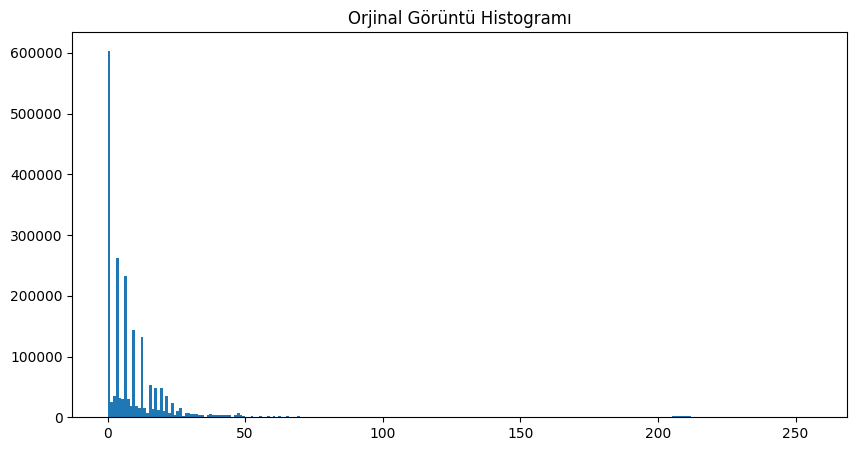

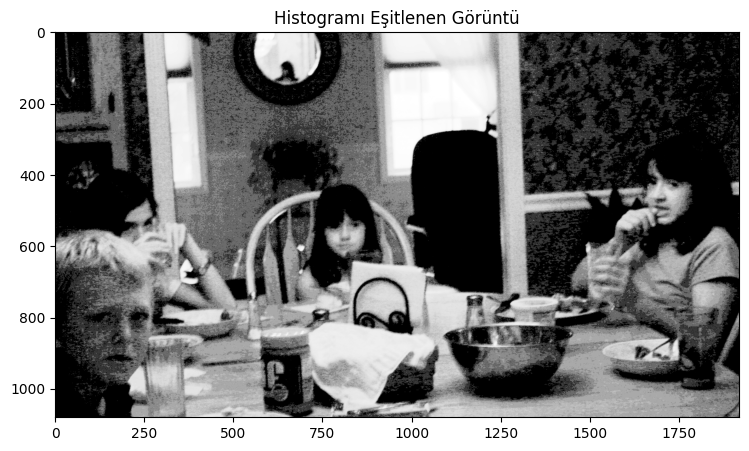

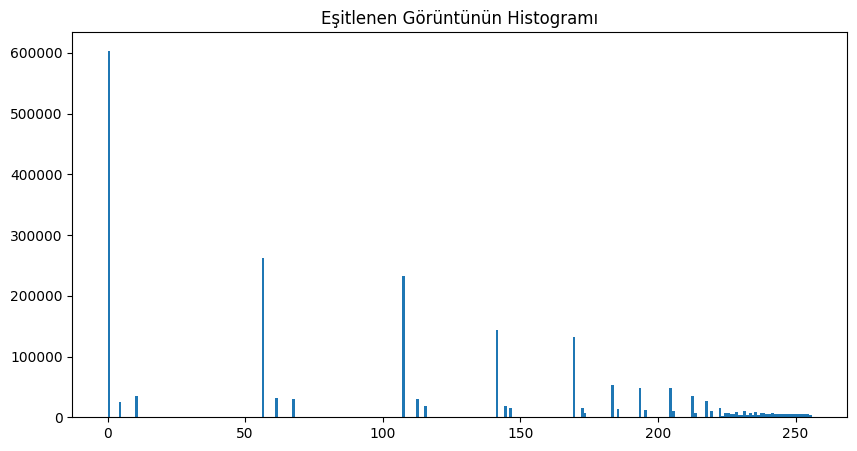

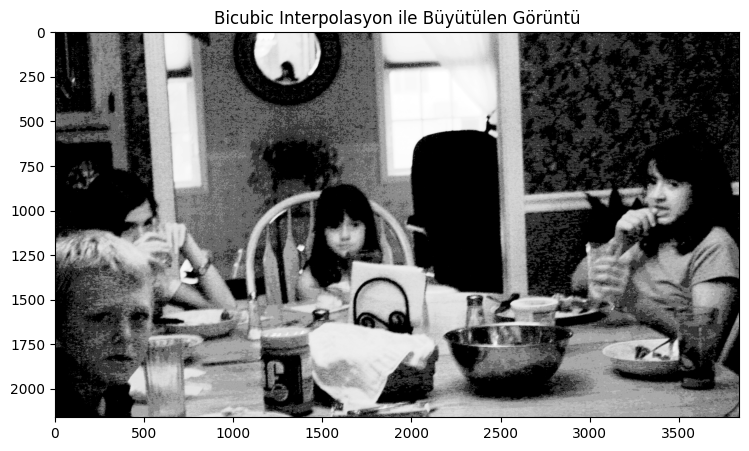

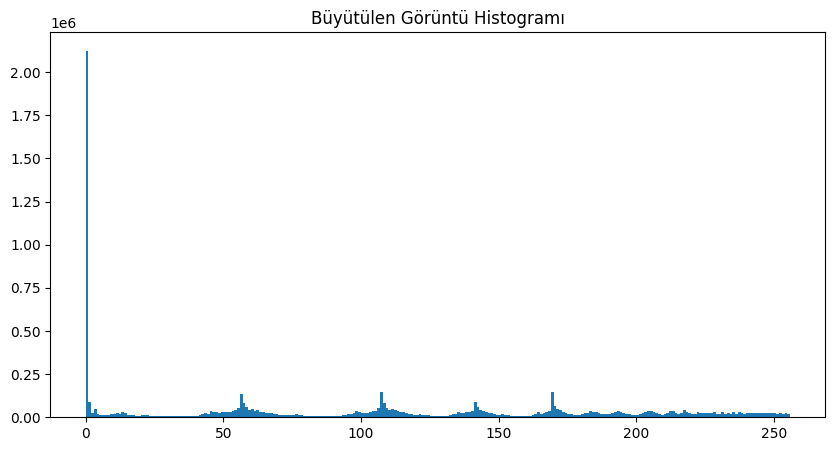

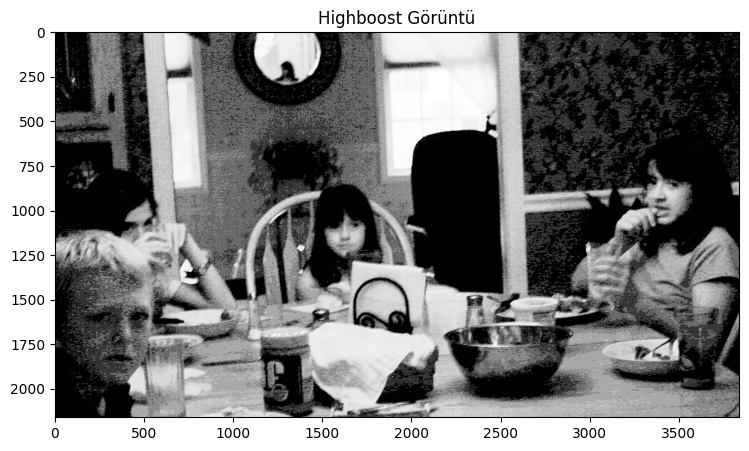

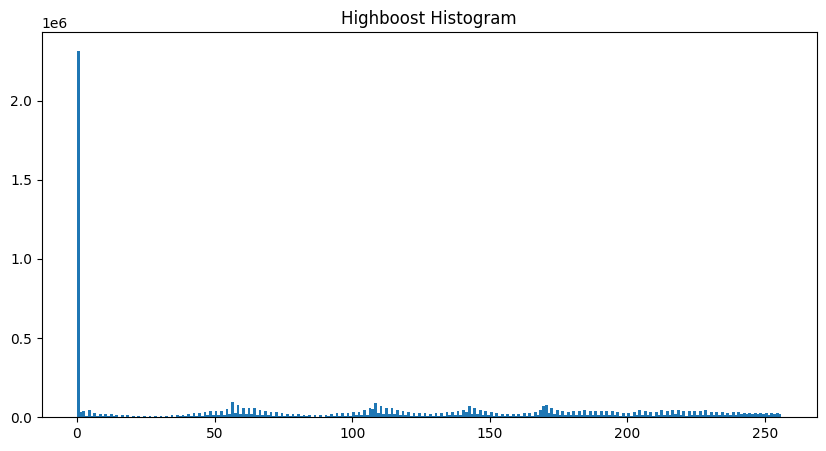

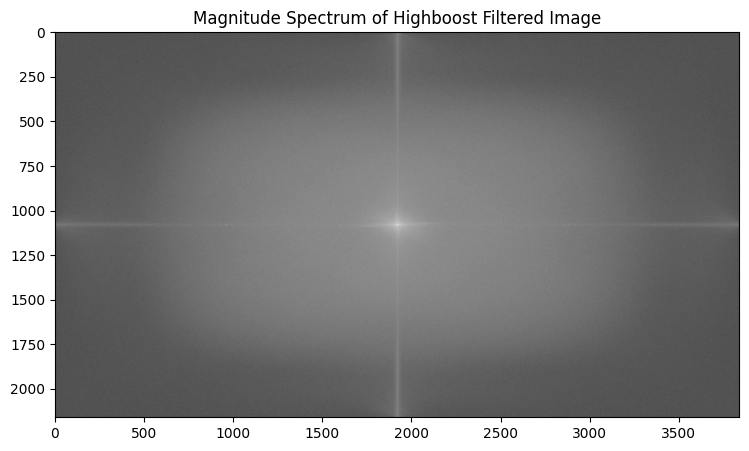

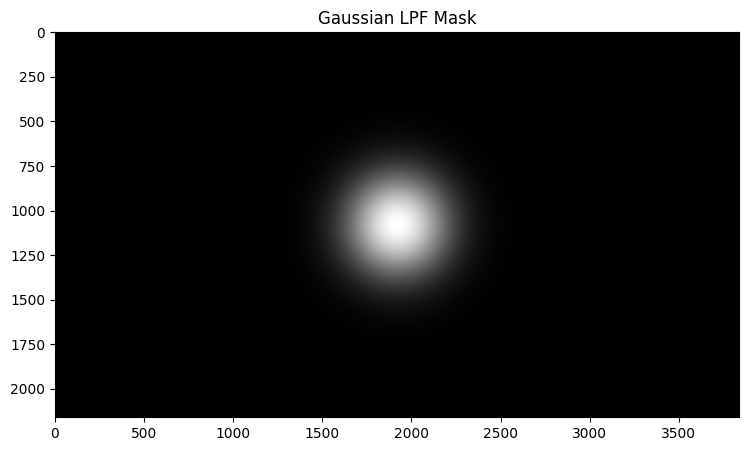

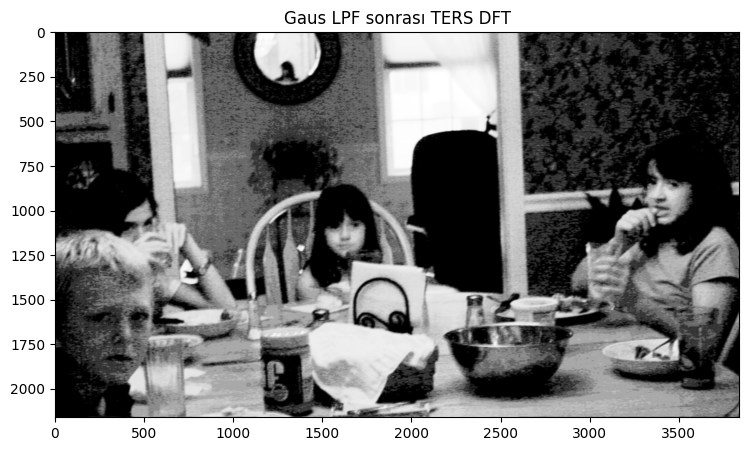

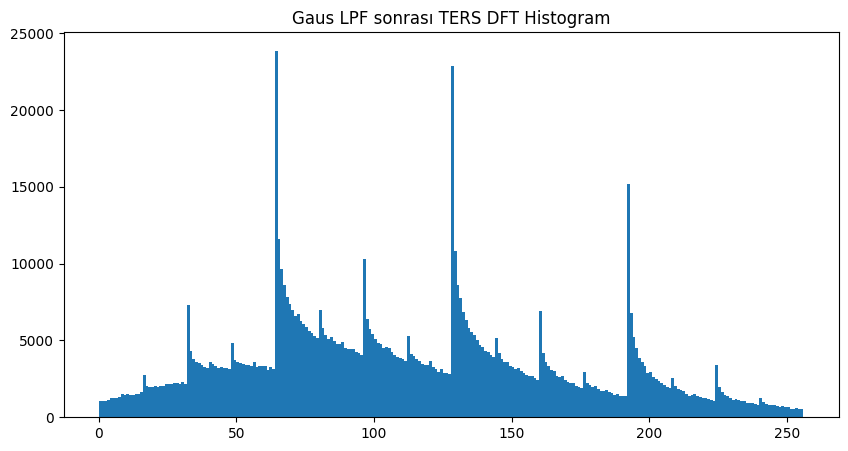

In [56]:
# Görüntüyü yükleme
image = cv2.imread('/content/drive/MyDrive/YZM507/goruntu3.png', cv2.IMREAD_GRAYSCALE)

# Orjinal Görüntü ve Histogramını Gösterme
plt.figure(figsize=(10, 5))
plt.imshow(image, cmap='gray')
plt.title('Orjinal Görüntü')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Orjinal Görüntü Histogramı')
plt.show()

# Histogram Eşitlemesi
equalized_image = cv2.equalizeHist(image)
plt.figure(figsize=(10, 5))
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogramı Eşitlenen Görüntü')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Eşitlenen Görüntünün Histogramı')
plt.show()

# Bicubic Interpolasyon ile Büyütme
resized_image = cv2.resize(equalized_image, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(10, 5))
plt.imshow(resized_image, cmap='gray')
plt.title('Bicubic Interpolasyon ile Büyütülen Görüntü')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(resized_image.ravel(), 256, [0, 256])
plt.title('Büyütülen Görüntü Histogramı')
plt.show()

# Unsharp Masking ve Highboost Filtering
blurred = cv2.GaussianBlur(resized_image, (9, 9), 10)
unsharp_image = cv2.addWeighted(resized_image, 1.5, blurred, -0.5, 0)
plt.figure(figsize=(10, 5))
plt.imshow(unsharp_image, cmap='gray')
plt.title('Highboost Görüntü')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(unsharp_image.ravel(), 256, [0, 256])
plt.title('Highboost Histogram')
plt.show()

# Highboost Filtrelenmiş Görüntünün DFT'si ve Genlik Spektrumu
dft = cv2.dft(np.float32(unsharp_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Gaussian LPF
D0 = 200  # LPF yarıçapı
rows, cols = unsharp_image.shape
crow, ccol = rows // 2, cols // 2
H = np.zeros((rows, cols, 2), np.float32)
for i in range(rows):
    for j in range(cols):
        H[i, j] = math.exp(-((i - crow) ** 2 + (j - ccol) ** 2) / (2 * D0 ** 2))

# LPF uygulama
fshift = dft_shift * H

# Ters DFT ile filtrenin uygulandığı görüntüyü geri alma
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum of Highboost Filtered Image')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(H[:, :, 0], cmap='gray')
plt.title('Gaussian LPF Mask')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(img_back, cmap='gray')
plt.title('Gaus LPF sonrası TERS DFT')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(img_back.ravel(), 256, [0, 256])
plt.title('Gaus LPF sonrası TERS DFT Histogram')
plt.show()
